## 1. 회귀

회귀 분석 : 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법   
여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모데링하는 기법을 통칭   
머신러닝 회귀 예측의 핵심 → 데이터 학습을 통한 최적의 회귀 계수를 찾아내는 것

- 독립변수 개수 1개 → 단일 회귀
- 독립변수 여러 개 → 다중 회귀
- 회귀 계수의 결합이 선형 → 선형 회귀 (가장 많이 사용됨)
- 회귀 계수의 결합이 비선형 → 비선형 회귀

분류 : 예측값이 카테고리와 같은 이산형 클래스 값   
회귀 : 예측값이 연속형 숫자 값

대표적인 선형 회귀 모델 )
- 일반 선형 회귀 : 예측값과 실제 값의 RSS (잔차제곱합) 를 최소화할 수 있도록 회귀 계수 최적화 (규제 적용 X)
- 릿지 : 선형 회귀 + L2 규제   
→ L2 규제 : 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만듦
- 라쏘 : 선형 회귀 + L1 규제   
→ L1 규제 : 예측 영향력이 작은 피처의 회귀 계수를 0으로 만듦(= 피처 선택 기능)
- 엘라스틱넷 : L1 + L2   
→ 피처가 많은 데이터셋에서 적용. L1으로 피처 개수 줄이고 L2로 계수 값 크기 조정
- 로지스틱 회귀 : 분류에 사용되는 선형 모델.   
→ 이진 분류, 희소 영역 분류, 텍스트 분류 등에서 뛰어난 성능

## 2. 단순 선형 회귀

단순 선형 회귀 : 독립변수 하나, 종속변수도 하나   
→ 기울기와 절편을 가진 1차 함수식으로 모델링 가능   
→ 기울기 w1, 절편 w0을 회귀 계수로 지칭   
→ Y = w0 + w1*X (실제 값 = w0 + w1*X + 오류 값)   


잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값.   
→ 최적의 회귀 모델 생성(= 최적의 회귀 계수를 찾는 것) : 잔차 합이 최소가 되는 모델을 만드는 것   
오류 합 계산 방법 )
- MAE : 절대값을 취해서 더함
- RSS : 오류 값의 제곱을 구해서 더함
   
RSS → w변수(회귀 계수) 로 구성되는 RSS를 비용 함수(손실 함수) 라고 함.   
→ 비용 함수가 반환하는 값인 오류 값을 지속해서 감소시키고 최정적으로는 더 이상 감소하지 않는 최소의 오류 값을 구해야 함.

## 3. 경사 하강법

핵심 : 비용함수를 지속적으로 미분하여, 최종적으로 1차 비용 함수의 기울기가 최소인 지점을 찾는 것

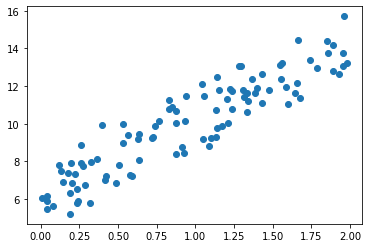

In [1]:
# 경사 하강법 구현
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6을 근사(w1 = 4, w0 = 6). 임의의 값은 노이즈를 위해 생성
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# 시각화
plt.scatter(X, y)

In [2]:
# 잔차제곱합 계산 함수
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

In [3]:
# 경사 하강법 함수 구현
# w1, w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복, w1,w0을 업데이트
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
  N = len(y)
  
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  w0_factors = np.ones((N, 1))

  w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
  w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [4]:
# 경사 하강법 반복, w1, w0 업데이트 하는 함수 생성
def gradient_descent_steps(X, y, iters = 10000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1, 1))

  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [5]:
w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1: {0:.3f} w0: {1:.3f}'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('gradient descent total cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.022 w0: 6.162
gradient descent total cost: 0.9935


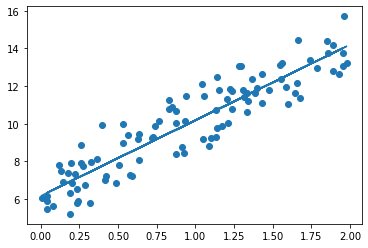

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)

경사 하강법 : 모든 학습 데이터에 대해 비용함수 값 업데이트   
→ 수행 시간이 매우 오래 걸림   
→ ' 확률적 경사 하강법 ' 이용   
확률적 경사 하강법 : 일부 데이터만 이용해 w 업데이트 값 계산 → 빠른 속도 보장

In [9]:
# 확률적 경사 하강법 함수 생성
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)

    # 전체 데이터에서 랜덤하게 batch_size 만큼 데이터 추출, 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [10]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print('w1: ', round(w1[0, 0], 3), 'w0: ', round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('stochastic gradient descent total cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1:  4.028 w0:  6.156
stochastic gradient descent total cost: 0.9937


## 4. 보스턴 주택 가격 예측

LinearRegression 클래스 : 잔차제곱합을 최소화해 OLS 추정 방식으로 구현한 클래스
- fit_intercept : 기본값 True. 절편 값을 계산할 것인지 말 것인지를 결정
- normalize : 기본값 False. True → 회귀 수행 전 데이터셋을 정규화
   
OLS(최소 제곱법) : 입력 피처간 상관관계가 높을 경우 분산이 커져 오류에 민감해짐 (다중 공산성)

### 회귀 평가 지표

1. MAE : 실제 값과 예측값의 차이를 절대값으로 변환해 평균
2. MSE : 실제 값과 예측값의 차이를 제곱해 평균
3. RMSE : MSE → 실제 오류 평균보다 더 커지는 특성   
→ MSE에 루트를 씌움
4. R^2 : 분산 기반으로 예측 성능 평가. 1에 가까울수록 예측 정확도가 높음   
(예측값 분산 / 실제값 분산)

사이킷런 : MAE, MSE, R^2 지원 (RMSE → MSE에 직접 루트를 씌워서 구해야 함)

### 피처 데이터

- CRIM : 지역별 범죄 발생률
- ZN : 25,000 평방피트를 초과하는 거주 지역 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(1: 강의 경계에 위치, 0: 아닌 경우)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000 달러 당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층 비율
- MEDV : 본인 소유 주택 가격(중앙값)

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기: ', bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


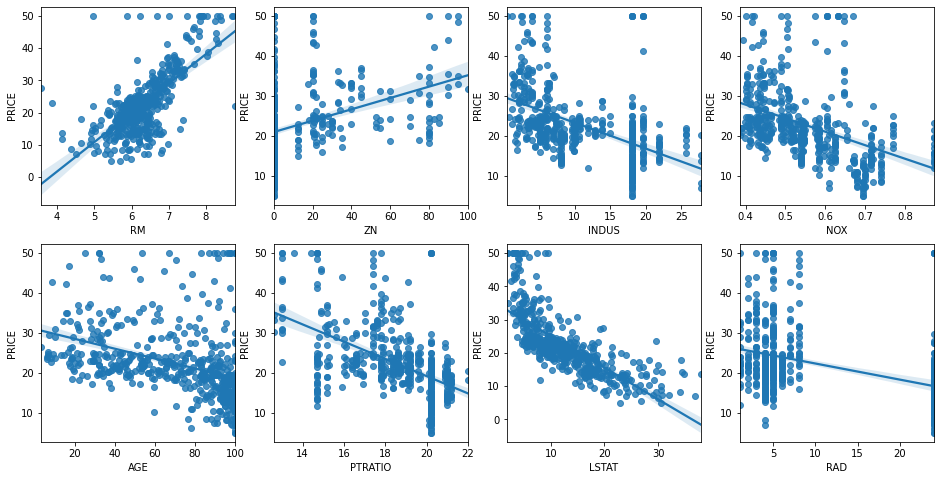

In [14]:
# 각 칼럼이 회귀 결과에 미치는 영향 시각화
# seaborn의 regplot(): 산점도 + 선형 회귀 직선
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i / 4)
  col = i % 4

  sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

RS(방 갯수) : 많을 수록 주택 가격이 높아짐 → 양의 선형성   
LSTAT(하위 계층 비율) : 많을 수록 가격이 낮아짐 → 음의 선형성

In [15]:
# 회귀 모델 생성
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

# OLS로 학습/예측/평가
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [16]:
# 절편, 회귀 계수 확인
print('절편 값: ', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

절편 값:  40.995595172164755
회귀 계수값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [17]:
# 회귀 계수 → 큰 값 순서대로 정렬
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64